# Fast.AI Numerical Linear Algebra

In [10]:
# imports
import numpy as np
%matplotlib inline

## Lesson 1

### Markov Chain Example

In [6]:
A = np.array([[.9,.07,.02,.01],
             [0,.93,.05,.02],
             [0,0,.85,.15],
             [0,0,0,1]])
x = np.array([[.85,.1,.05,0]])
A.T @ x.T  # Matrix multiply == (x @ A).T

array([[ 0.765 ],
       [ 0.1525],
       [ 0.0645],
       [ 0.018 ]])

### Matrix-Matrix products

In [8]:
# A -> Person quantity bought
# B -> Product Price for each shop
A = np.array([[6,5,3,1],
             [3,6,2,2],
             [3,4,3,1]])
B = np.array([[1.5,1],
             [2,2.5],
             [5,4.5],
             [16,17]])
A @ B

array([[ 50. ,  49. ],
       [ 58.5,  61. ],
       [ 43.5,  43.5]])

### Image Data Convolution

In [11]:
# Image Data Setup
import math, sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [27]:
def plots(ims, interp=False, titles=None):
    ims = np.array(ims)
    mn,mx = ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp = f.add_subplot(1, len(ims), i+1)
        if not titles is None:
            sp.set_title(titles[i], fontsize=18)
            plt.imshow(ims[i], 
                interpolation=None if interp else 'none', 
                vmin=mn, vmax=mx)
            
def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')
    
plt.gray()
plt.close()

In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [15]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [16]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [32]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n = len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [33]:
# Normalize images
images = images/255

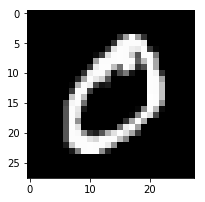

In [34]:
plot(images[0])

In [21]:
labels[0]

0

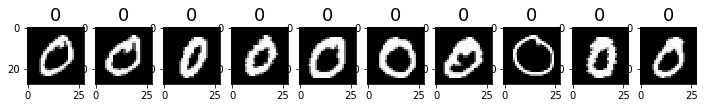

In [35]:
plots(images[:10], titles=labels[:10])

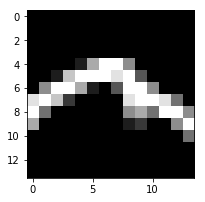

In [38]:
plot(images[7,0:14,8:22])

In [42]:
dims = np.index_exp[10:28:1,3:13]
images[7][dims]

array([[ 0.    ,  0.    ,  0.2235,  1.    ,  0.6667,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.8863,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    ,  0.8863,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    ,  0.6667,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    ,  0.8863,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.7765,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.4471,  1.    ,  0.2235,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.1137,  1.    ,  0.8863,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.6667,  1.    ,  0.6667,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.1137,  0.8863,  1.    ,  0.6667,  0.    ,  0.    ,  0.    ],
       [ 0

#### Edge Detection

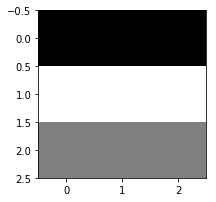

In [40]:
top = [[-1,-1,-1],
       [1,1,1],
       [0,0,0]]
plot(top)

In [43]:
# Array correlated with kernel filter top
corrtop = correlate(images[7], top)

In [44]:
corrtop[dims]

array([[ 0.    ,  0.2235,  0.3373,  0.0039, -0.8863, -1.    , -0.6667,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.6627,  0.6627, -0.0039, -0.6667, -0.6667,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.1137,  0.    ,  0.    , -0.1137,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -0.2196, -0.2196, -0.2196,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.2196,  0.2196,  0.2196,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.2235, -0.1098, -0.1098,  0.1137,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.3294, -0.3294, -0.1059,  0.2235,  0.2235,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.3333, -0.3333,  0.3294,  0.6627,  0.6627,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.1137, -0.4471, -0.3333,  0.4471,  0.7804,  0.6667,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -0.5529, -0.6667, -0.3333,  0.8863,  1.    ,  0.6667,  0.    ,  0.    ],
       [ 0

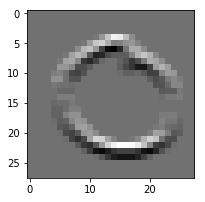

In [45]:
plot(corrtop)

In [46]:
np.rot90(top)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

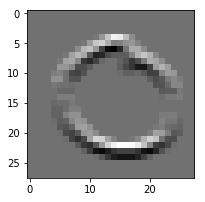

In [48]:
# Array convolved with kernel filter top
convtop = convolve(images[7], np.rot90(top, 2))
plot(convtop)
np.allclose(convtop, corrtop)

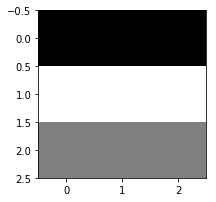

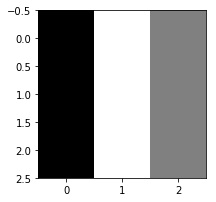

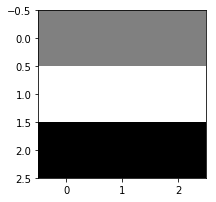

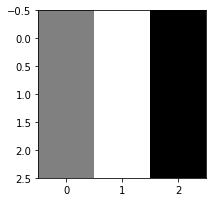

In [55]:
# Rotate to get different orientation filters
straights = [np.rot90(top,i) for i in range(4)]
for straight in straights: 
    plot(straight)

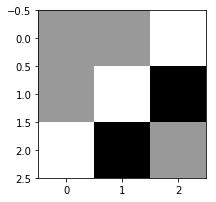

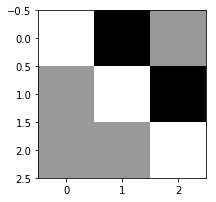

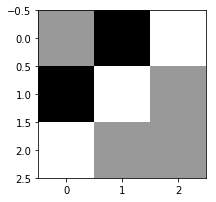

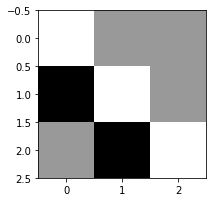

In [57]:
br = [[0,0,1],
      [0,1,-1.5],
      [1,-1.5,0]]
diags = [np.rot90(br,i) for i in range(4)]
for diag in diags:
    plot(diag)

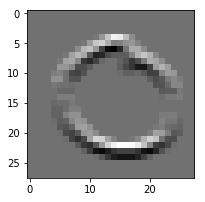

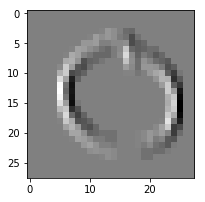

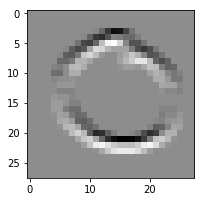

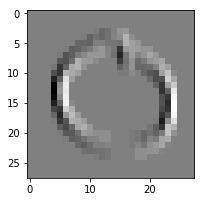

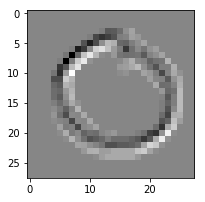

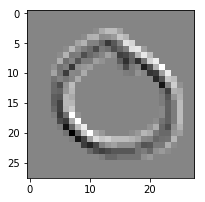

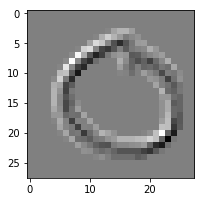

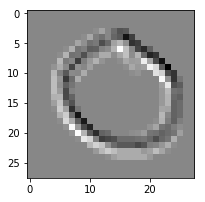

In [61]:
rots = straights + diags
corrs = [correlate(images[7], rot) for rot in rots]
for corr in corrs:
    plot(corr)

### Accuracy
#### Conditioning and Stability

In [63]:
# Small change in input affects output
# Eigenvalues very different with small change
import scipy.linalg as la

A = np.array([[1,1000],[0,1]])
B = np.array([[1,1000],[0.001,1]])
print(A)
print(B)

[[   1 1000]
 [   0    1]]
[[  1.0000e+00   1.0000e+03]
 [  1.0000e-03   1.0000e+00]]


In [64]:
# Makes sure 0 precision is set
np.set_printoptions(suppress=True, precision=4)

In [65]:
wA, vrA = la.eig(A)
wB, vrB = la.eig(B)
wA, wB

(array([ 1.+0.j,  1.+0.j]), array([ 2.+0.j,  0.+0.j]))

### Memory
Sparse if scales with either number of columns of rows,
dense if scales with product of rows and columns

### Speed
Computational Complexity
Vectorization (BLAS, LAPACK)
Locality (Where getting data from)


### Scalability/Parallelization
Scale across multiple cores